In [1]:
from google.colab import drive
import os
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/' + input('Input the directory with your Kaggle json file: ') # Dejar input vacío en caso de que el archivo se encuentre en la raíz de Drive
! kaggle datasets download -d kingabzpro/gambling-behavior-bustabit  # Descarga del archivo comprimido
!unzip \*.zip && rm *.zip # Descomprensión y eliminación de cualquier archivo .zip

Input the directory with your Kaggle json file: 
Dataset URL: https://www.kaggle.com/datasets/kingabzpro/gambling-behavior-bustabit
License(s): GPL-2.0
  0% 0.00/1.30M [00:00<?, ?B/s]
100% 1.30M/1.30M [00:00<00:00, 87.6MB/s]
Archive:  gambling-behavior-bustabit.zip
  inflating: bustabit.csv            


In [ ]:
#Instalación de librerías
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn
!pip install scipy
!pip install statsmodels
!pip install imbalanced-learn
!pip install scikit-plot
!pip install graphviz

In [3]:
#Datos
import pandas as pd
import numpy as np

#Graficar
import seaborn as sns
import matplotlib.pyplot as plt
#import matplotlib
#import matplotlib.patches as patches


# Generador de tablas de contingencia
from pandas import crosstab
from sklearn.metrics import mutual_info_score

#Test chi-cuadrado
from scipy.stats import chi2_contingency

#Imputación
from sklearn.impute import SimpleImputer
#from sklearn.impute import KNNImputer


#QQ
import statsmodels.api as sm
#Shapiro
from scipy import stats

#Escalamiento
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import RobustScaler

#Transformación numérica
#from sklearn.preprocessing import LabelEncoder

#K-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Outliers
from sklearn.neighbors import LocalOutlierFactor
from scipy.special import entr #Entropía

#Balanceo
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

#Advertencias
import warnings

#Separación train-test
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

#Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn import neighbors
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.tree import plot_tree
import graphviz
#from sklearn.tree import export_graphviz
#from sklearn.naive_bayes import CategoricalNB

#Métricas
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#from sklearn.metrics import calinski_harabasz_score
#from sklearn.metrics import davies_bouldin_score
#from sklearn.metrics import pairwise_distances


#Otros

#import io
#import requests
#from sklearn.model_selection import RepeatedKFold
#from sklearn.inspection import permutation_importance
#from sklearn import datasets
#from sklearn.random_projection import johnson_lindenstrauss_min_dim, GaussianRandomProjection, SparseRandomProjection
#from sklearn.decomposition import PCA
#from sklearn.decomposition import KernelPCA
#from sklearn.datasets import make_classification
#from scipy import special
#from scipy.stats import spearmanr
#from scipy.spatial.distance import euclidean
#from collections import defaultdict
#from yellowbrick.cluster import KElbowVisualizer
#from validclust.indices import dunn
#from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality

In [4]:
#Lectura base de datos
betdataset = pd.read_csv('bustabit.csv')

In [5]:
betdataset

,Id,GameID,Username,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate
0,14196549,3366002,papai,5,1.20,0.0,1.00,8.24,2016-11-20T19:44:19Z
1,10676217,3343882,znay22,3,NaN,NaN,NaN,1.40,2016-11-14T14:21:50Z
2,15577107,3374646,rrrrrrrr,4,1.33,3.0,1.44,3.15,2016-11-23T06:39:15Z
3,25732127,3429241,sanya1206,10,NaN,NaN,NaN,1.63,2016-12-08T18:13:55Z
4,17995432,3389174,ADM,50,1.50,1.4,25.70,2.29,2016-11-27T08:14:48Z
...,...,...,...,...,...,...,...,...,...
49995,21345100,3406167,ElenaV,4,NaN,NaN,NaN,4.80,2016-12-02T05:00:57Z
49996,1461408,3302415,Sandboxx,3000,1.04,0.0,120.00,5.03,2016-11-02T19:01:58Z
49997,19704592,3398419,Ferreck,1,NaN,NaN,NaN,1.06,2016-11-29T23:48:11Z
49998,20075463,3400278,ugneri,68,1.33,0.0,22.44,19.00,2016-11-30T12:29:56Z


In [6]:
#Corregimos el porcentaje
betdataset['Bonus']=betdataset['Bonus']/100
betdataset

,Id,GameID,Username,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate
0,14196549,3366002,papai,5,1.20,0.000,1.00,8.24,2016-11-20T19:44:19Z
1,10676217,3343882,znay22,3,NaN,NaN,NaN,1.40,2016-11-14T14:21:50Z
2,15577107,3374646,rrrrrrrr,4,1.33,0.030,1.44,3.15,2016-11-23T06:39:15Z
3,25732127,3429241,sanya1206,10,NaN,NaN,NaN,1.63,2016-12-08T18:13:55Z
4,17995432,3389174,ADM,50,1.50,0.014,25.70,2.29,2016-11-27T08:14:48Z
...,...,...,...,...,...,...,...,...,...
49995,21345100,3406167,ElenaV,4,NaN,NaN,NaN,4.80,2016-12-02T05:00:57Z
49996,1461408,3302415,Sandboxx,3000,1.04,0.000,120.00,5.03,2016-11-02T19:01:58Z
49997,19704592,3398419,Ferreck,1,NaN,NaN,NaN,1.06,2016-11-29T23:48:11Z
49998,20075463,3400278,ugneri,68,1.33,0.000,22.44,19.00,2016-11-30T12:29:56Z


In [7]:
betdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         50000 non-null  int64  
 1   GameID     50000 non-null  int64  
 2   Username   50000 non-null  object 
 3   Bet        50000 non-null  int64  
 4   CashedOut  28734 non-null  float64
 5   Bonus      28734 non-null  float64
 6   Profit     28734 non-null  float64
 7   BustedAt   50000 non-null  float64
 8   PlayDate   50000 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 3.4+ MB


In [8]:
variables= betdataset.columns
variables

Index(['Id', 'GameID', 'Username', 'Bet', 'CashedOut', 'Bonus', 'Profit',
       'BustedAt', 'PlayDate'],
      dtype='object')

In [9]:
#Buscamos duplicados
betdataset.loc[betdataset.duplicated()]

,Id,GameID,Username,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate


In [10]:
#En busca de calidad en los datos
for i in variables:
    print(betdataset[i].value_counts(), "\n", "\n")

Id
14196549    1
9800022     1
21567184    1
5704369     1
7045514     1
           ..
26783415    1
9199719     1
21730659    1
13192037    1
14739654    1
Name: count, Length: 50000, dtype: int64 
 

GameID
3399896    5
3316666    5
3326324    5
3355418    5
3327220    5
          ..
3367713    1
3374714    1
3400036    1
3428706    1
3369631    1
Name: count, Length: 42152, dtype: int64 
 

Username
megainvest       291
Babuan12345      272
xrnath           236
JohnL            234
Kirr923          216
                ... 
mavneee            1
Scorpius           1
FknJw              1
adswebtune         1
bitcoinbandit      1
Name: count, Length: 4149, dtype: int64 
 

Bet
1         6603
2         3169
10        2403
3         2127
4         1787
          ... 
6135         1
5419         1
31000        1
475000       1
3328         1
Name: count, Length: 2758, dtype: int64 
 

CashedOut
1.04     2744
1.05     2704
1.10     2573
2.00     2164
1.50     1160
         ... 
26.84       

In [11]:
betdataset.describe()

,Id,GameID,Bet,CashedOut,Bonus,Profit,BustedAt
count,5.000000e+04,5.000000e+04,50000.000000,28734.000000,28734.000000,2.873400e+04,50000.000000
mean,1.353050e+07,3.363443e+06,2935.250980,1.686600,0.013803,1.534772e+03,16.790000
std,7.768258e+06,4.160723e+04,30651.925762,2.185089,0.016281,2.000082e+04,1172.876203
min,8.540000e+02,3.294811e+06,1.000000,1.000000,0.000000,0.000000e+00,0.000000
25%,6.829364e+06,3.325926e+06,4.000000,1.070000,0.000000,8.500000e-01,1.310000
50%,1.357023e+07,3.362088e+06,20.000000,1.210000,0.010000,5.330000e+00,1.950000
75%,2.023714e+07,3.400994e+06,180.000000,1.570000,0.024700,6.303250e+01,3.852500
max,2.697852e+07,3.436562e+06,1000000.000000,126.000000,0.121400,1.175993e+06,251025.130000


In [12]:
from datetime import datetime, time

In [13]:
#Corregimos formato fecha
def convertir_a_datetime(fecha_str):
    return datetime.fromisoformat(fecha_str.replace('Z', '+00:00'))

# Aplicar la función a toda la columna 'fecha_iso'
betdataset['PlayDate'] = betdataset['PlayDate'].apply(lambda x: convertir_a_datetime(x))

In [14]:
betdataset['Date'] = betdataset['PlayDate'].apply(lambda x: x.date())
betdataset['Time'] = betdataset['PlayDate'].apply(lambda x: x.time())

In [15]:
betdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Id         50000 non-null  int64              
 1   GameID     50000 non-null  int64              
 2   Username   50000 non-null  object             
 3   Bet        50000 non-null  int64              
 4   CashedOut  28734 non-null  float64            
 5   Bonus      28734 non-null  float64            
 6   Profit     28734 non-null  float64            
 7   BustedAt   50000 non-null  float64            
 8   PlayDate   50000 non-null  datetime64[ns, UTC]
 9   Date       50000 non-null  object             
 10  Time       50000 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(4), int64(3), object(3)
memory usage: 4.2+ MB


In [16]:
betdataset['Date'] = pd.to_datetime(betdataset['Date'])
#betdataset['Time'] = pd.to_timedelta(betdataset['Time'])

In [17]:
betdataset['Time'] = pd.to_datetime(betdataset['Time'], format='%H:%M:%S').dt.time

In [18]:
betdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Id         50000 non-null  int64              
 1   GameID     50000 non-null  int64              
 2   Username   50000 non-null  object             
 3   Bet        50000 non-null  int64              
 4   CashedOut  28734 non-null  float64            
 5   Bonus      28734 non-null  float64            
 6   Profit     28734 non-null  float64            
 7   BustedAt   50000 non-null  float64            
 8   PlayDate   50000 non-null  datetime64[ns, UTC]
 9   Date       50000 non-null  datetime64[ns]     
 10  Time       50000 non-null  object             
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 4.2+ MB


In [19]:
betdataset

,Id,GameID,Username,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate,Date,Time
0,14196549,3366002,papai,5,1.20,0.000,1.00,8.24,2016-11-20 19:44:19+00:00,2016-11-20,19:44:19
1,10676217,3343882,znay22,3,NaN,NaN,NaN,1.40,2016-11-14 14:21:50+00:00,2016-11-14,14:21:50
2,15577107,3374646,rrrrrrrr,4,1.33,0.030,1.44,3.15,2016-11-23 06:39:15+00:00,2016-11-23,06:39:15
3,25732127,3429241,sanya1206,10,NaN,NaN,NaN,1.63,2016-12-08 18:13:55+00:00,2016-12-08,18:13:55
4,17995432,3389174,ADM,50,1.50,0.014,25.70,2.29,2016-11-27 08:14:48+00:00,2016-11-27,08:14:48
...,...,...,...,...,...,...,...,...,...,...,...
49995,21345100,3406167,ElenaV,4,NaN,NaN,NaN,4.80,2016-12-02 05:00:57+00:00,2016-12-02,05:00:57
49996,1461408,3302415,Sandboxx,3000,1.04,0.000,120.00,5.03,2016-11-02 19:01:58+00:00,2016-11-02,19:01:58
49997,19704592,3398419,Ferreck,1,NaN,NaN,NaN,1.06,2016-11-29 23:48:11+00:00,2016-11-29,23:48:11
49998,20075463,3400278,ugneri,68,1.33,0.000,22.44,19.00,2016-11-30 12:29:56+00:00,2016-11-30,12:29:56


In [20]:
#Realizamos la imputación y corrección de datos nulos
betdataset['Profit'].fillna(-betdataset['Bet'], inplace=True)

In [21]:
betdataset['Bonus'].fillna(0, inplace=True)

In [22]:
betdataset['CashedOut'].fillna(0, inplace=True)

In [23]:
#Añadimos una nueva columna
betdataset['Result']=betdataset['Profit'].apply(lambda x: 1 if x>0 else 0)

In [24]:
betdataset

,Id,GameID,Username,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate,Date,Time,Result
0,14196549,3366002,papai,5,1.20,0.000,1.00,8.24,2016-11-20 19:44:19+00:00,2016-11-20,19:44:19,1
1,10676217,3343882,znay22,3,0.00,0.000,-3.00,1.40,2016-11-14 14:21:50+00:00,2016-11-14,14:21:50,0
2,15577107,3374646,rrrrrrrr,4,1.33,0.030,1.44,3.15,2016-11-23 06:39:15+00:00,2016-11-23,06:39:15,1
3,25732127,3429241,sanya1206,10,0.00,0.000,-10.00,1.63,2016-12-08 18:13:55+00:00,2016-12-08,18:13:55,0
4,17995432,3389174,ADM,50,1.50,0.014,25.70,2.29,2016-11-27 08:14:48+00:00,2016-11-27,08:14:48,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,21345100,3406167,ElenaV,4,0.00,0.000,-4.00,4.80,2016-12-02 05:00:57+00:00,2016-12-02,05:00:57,0
49996,1461408,3302415,Sandboxx,3000,1.04,0.000,120.00,5.03,2016-11-02 19:01:58+00:00,2016-11-02,19:01:58,1
49997,19704592,3398419,Ferreck,1,0.00,0.000,-1.00,1.06,2016-11-29 23:48:11+00:00,2016-11-29,23:48:11,0
49998,20075463,3400278,ugneri,68,1.33,0.000,22.44,19.00,2016-11-30 12:29:56+00:00,2016-11-30,12:29:56,1


In [ ]:
#betdataset['Result'] = np.where(betdataset['Profit'] > 0, 1, 0)
#betdataset

,Id,GameID,Username,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate,Date,Time,Result
0,14196549,3366002,papai,5,1.20,0.000,1.00,8.24,2016-11-20 19:44:19+00:00,2016-11-20,19:44:19,1
1,10676217,3343882,znay22,3,0.00,0.000,-3.00,1.40,2016-11-14 14:21:50+00:00,2016-11-14,14:21:50,0
2,15577107,3374646,rrrrrrrr,4,1.33,0.030,1.44,3.15,2016-11-23 06:39:15+00:00,2016-11-23,06:39:15,1
3,25732127,3429241,sanya1206,10,0.00,0.000,-10.00,1.63,2016-12-08 18:13:55+00:00,2016-12-08,18:13:55,0
4,17995432,3389174,ADM,50,1.50,0.014,25.70,2.29,2016-11-27 08:14:48+00:00,2016-11-27,08:14:48,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,21345100,3406167,ElenaV,4,0.00,0.000,-4.00,4.80,2016-12-02 05:00:57+00:00,2016-12-02,05:00:57,0
49996,1461408,3302415,Sandboxx,3000,1.04,0.000,120.00,5.03,2016-11-02 19:01:58+00:00,2016-11-02,19:01:58,1
49997,19704592,3398419,Ferreck,1,0.00,0.000,-1.00,1.06,2016-11-29 23:48:11+00:00,2016-11-29,23:48:11,0
49998,20075463,3400278,ugneri,68,1.33,0.000,22.44,19.00,2016-11-30 12:29:56+00:00,2016-11-30,12:29:56,1


In [25]:
#Datos generales
betdataset['Result'].value_counts()

Result
1    28685
0    21315
Name: count, dtype: int64

In [26]:
suma_positivos = betdataset[betdataset['Profit'] > 0]['Profit'].sum()
suma_positivos

44100139.26999999

In [27]:
betdataset[betdataset['Profit'] > 0]

,Id,GameID,Username,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate,Date,Time,Result
0,14196549,3366002,papai,5,1.20,0.000,1.00,8.24,2016-11-20 19:44:19+00:00,2016-11-20,19:44:19,1
2,15577107,3374646,rrrrrrrr,4,1.33,0.030,1.44,3.15,2016-11-23 06:39:15+00:00,2016-11-23,06:39:15,1
4,17995432,3389174,ADM,50,1.50,0.014,25.70,2.29,2016-11-27 08:14:48+00:00,2016-11-27,08:14:48,1
6,10802671,3344556,charles150,1,1.05,0.040,0.09,1.05,2016-11-14 18:52:58+00:00,2016-11-14,18:52:58,1
8,15421788,3373736,fluxxy,2000,1.20,0.000,400.00,9.14,2016-11-23 00:26:05+00:00,2016-11-23,00:26:05,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49992,12773322,3356689,N1ndy,10,1.50,0.000,5.00,2.86,2016-11-18 04:46:56+00:00,2016-11-18,04:46:56,1
49993,19373273,3396874,tatiana31,79,1.10,0.000,7.90,1.51,2016-11-29 12:52:43+00:00,2016-11-29,12:52:43,1
49996,1461408,3302415,Sandboxx,3000,1.04,0.000,120.00,5.03,2016-11-02 19:01:58+00:00,2016-11-02,19:01:58,1
49998,20075463,3400278,ugneri,68,1.33,0.000,22.44,19.00,2016-11-30 12:29:56+00:00,2016-11-30,12:29:56,1


In [28]:
betdataset[betdataset['Profit'] > 0]['Profit']

0          1.00
2          1.44
4         25.70
6          0.09
8        400.00
          ...  
49992      5.00
49993      7.90
49996    120.00
49998     22.44
49999     90.00
Name: Profit, Length: 28685, dtype: float64

In [29]:
suma_negativos = betdataset[betdataset['Profit'] < 0]['Profit'].sum()
suma_negativos

-41813021.0

In [30]:
betdataset['Profit'].sum()

2287118.27

In [31]:
betdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Id         50000 non-null  int64              
 1   GameID     50000 non-null  int64              
 2   Username   50000 non-null  object             
 3   Bet        50000 non-null  int64              
 4   CashedOut  50000 non-null  float64            
 5   Bonus      50000 non-null  float64            
 6   Profit     50000 non-null  float64            
 7   BustedAt   50000 non-null  float64            
 8   PlayDate   50000 non-null  datetime64[ns, UTC]
 9   Date       50000 non-null  datetime64[ns]     
 10  Time       50000 non-null  object             
 11  Result     50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 4.6+ MB


In [32]:
#Ordenamos por profit
betdataset_sorted = betdataset.sort_values(by='Profit', ascending=False)
betdataset_sorted

,Id,GameID,Username,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate,Date,Time,Result
3570,14615227,3368809,goosin2000,550000,3.10,0.0382,1175993.10,3.60,2016-11-21 14:39:56+00:00,2016-11-21,14:39:56,1
17735,6917263,3326280,GPL89,475000,3.31,0.0148,1104277.04,5.50,2016-11-09 14:14:43+00:00,2016-11-09,14:14:43,1
39293,12768482,3356651,allg1124,1000000,2.00,0.0115,1011494.44,2.48,2016-11-18 04:31:48+00:00,2016-11-18,04:31:48,1
22379,24494126,3422040,Alexy,1000000,1.94,0.0113,951253.33,5.02,2016-12-06 17:46:15+00:00,2016-12-06,17:46:15,1
14281,2220826,3306254,GPL89,500000,2.53,0.0126,771282.37,12.41,2016-11-03 21:16:41+00:00,2016-11-03,21:16:41,1
...,...,...,...,...,...,...,...,...,...,...,...,...
43113,20656280,3402992,Chelashin,641024,0.00,0.0000,-641024.00,1.10,2016-12-01 07:26:41+00:00,2016-12-01,07:26:41,0
13805,1271636,3301467,inside,969000,0.00,0.0000,-969000.00,1.93,2016-11-02 12:34:41+00:00,2016-11-02,12:34:41,0
48121,21220511,3405443,Alexy,1000000,0.00,0.0000,-1000000.00,1.40,2016-12-02 00:14:30+00:00,2016-12-02,00:14:30,0
31231,8178260,3331733,Jlau,1000000,0.00,0.0000,-1000000.00,1.04,2016-11-11 03:28:36+00:00,2016-11-11,03:28:36,0


In [33]:
#El que más perdió
betdataset.groupby('Username')['Profit'].sum().sort_values(ascending=True)

Username
Alexy          -1465227.51
inside         -1245000.00
Jlau           -1072222.00
period          -845423.55
maras           -752148.77
                   ...    
sce919           596856.84
rapidfireman     932131.31
goosin2000      1544213.87
GPL89           1875559.41
allg1124        3182621.34
Name: Profit, Length: 4149, dtype: float64

In [34]:
#El que más ganó
betdataset.groupby('Username')['Profit'].sum().sort_values(ascending=False)

Username
allg1124        3182621.34
GPL89           1875559.41
goosin2000      1544213.87
rapidfireman     932131.31
sce919           596856.84
                   ...    
maras           -752148.77
period          -845423.55
Jlau           -1072222.00
inside         -1245000.00
Alexy          -1465227.51
Name: Profit, Length: 4149, dtype: float64

In [35]:
MaxCO = betdataset['CashedOut'].idxmax()
MaxCO

14944

In [36]:
betdataset.loc[MaxCO]

Id                            16073138
GameID                         3377519
Username                      standy89
Bet                                 27
CashedOut                        126.0
Bonus                           0.0348
Profit                         3375.94
BustedAt                        261.08
PlayDate     2016-11-24 02:17:03+00:00
Date               2016-11-24 00:00:00
Time                          02:17:03
Result                               1
Name: 14944, dtype: object

In [37]:
a=betdataset.iloc[3570]
a

Id                            14615227
GameID                         3368809
Username                    goosin2000
Bet                             550000
CashedOut                          3.1
Bonus                           0.0382
Profit                       1175993.1
BustedAt                           3.6
PlayDate     2016-11-21 14:39:56+00:00
Date               2016-11-21 00:00:00
Time                          14:39:56
Result                               1
Name: 3570, dtype: object

In [38]:
betdataset.columns

Index(['Id', 'GameID', 'Username', 'Bet', 'CashedOut', 'Bonus', 'Profit',
       'BustedAt', 'PlayDate', 'Date', 'Time', 'Result'],
      dtype='object')

In [39]:
delete=['Id','GameID', 'Username',  'PlayDate', 'Date', 'Time']
cuantitativos=betdataset.columns.drop(delete)
cuantitativos

Index(['Bet', 'CashedOut', 'Bonus', 'Profit', 'BustedAt', 'Result'], dtype='object')

<ipython-input-40-295e458521a3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = betdataset[cuantitativos[i]], linewidth = 3, palette="Set2", fliersize = 3)
<ipython-input-40-295e458521a3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = betdataset[cuantitativos[i]], linewidth = 3, palette="Set2", fliersize = 3)
<ipython-input-40-295e458521a3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = betdataset[cuantitativos[i]], linewidth = 3, palette="Set2", fliersize = 3)
<ipython-input-40-295e458521a3>:5: FutureWarning: 

Pas

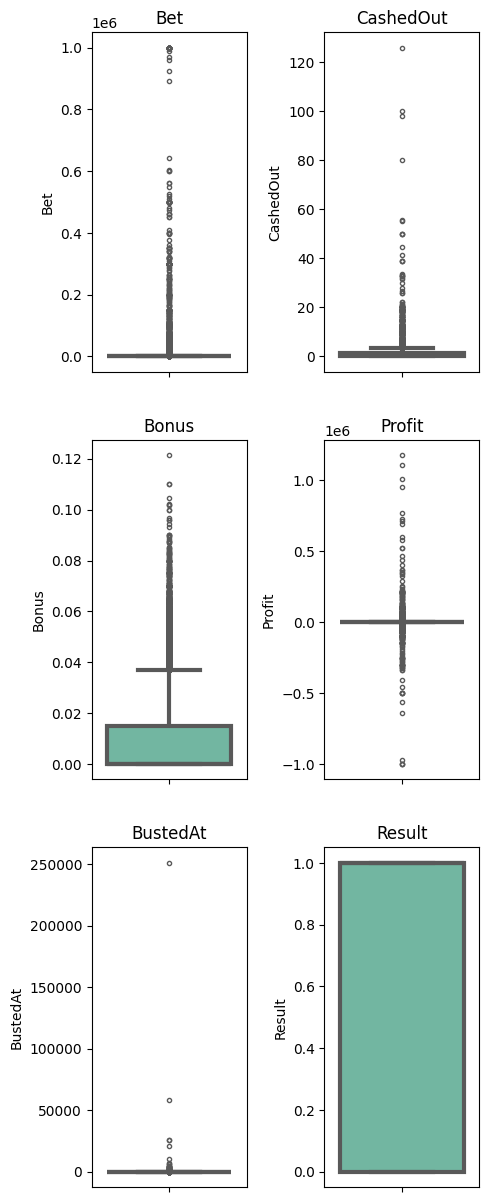

In [40]:
#Independizamos cada boxplot en su propia escala
plt.figure(figsize=(5, 15))
for i in range (len(cuantitativos)):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data = betdataset[cuantitativos[i]], linewidth = 3, palette="Set2", fliersize = 3)
    plt.title(cuantitativos[i])
plt.subplots_adjust(wspace=0.5)

In [41]:
df_cuantitativos=pd.DataFrame()
for i in cuantitativos:
    df_cuantitativos[i]=betdataset[i]

df_cuantitativos

,Bet,CashedOut,Bonus,Profit,BustedAt,Result
0,5,1.20,0.000,1.00,8.24,1
1,3,0.00,0.000,-3.00,1.40,0
2,4,1.33,0.030,1.44,3.15,1
3,10,0.00,0.000,-10.00,1.63,0
4,50,1.50,0.014,25.70,2.29,1
...,...,...,...,...,...,...
49995,4,0.00,0.000,-4.00,4.80,0
49996,3000,1.04,0.000,120.00,5.03,1
49997,1,0.00,0.000,-1.00,1.06,0
49998,68,1.33,0.000,22.44,19.00,1


<Axes: >

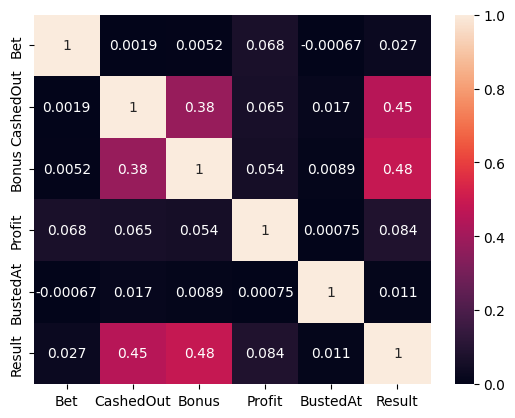

In [42]:
sns.heatmap(df_cuantitativos.corr()
            , annot=True  # agregar valores en cada celda
               # formato de los valores (d = decimal)
           )


In [ ]:
#Se elimina la columna ID ya que no aporta nada a la base de datos por ser datos únicos
#df=df.drop(['id'], axis=1)

In [43]:
#Nueva base de datos escalada, con datos sintéticos y codificada
data_cat_Dummy = pd.get_dummies(betdataset, drop_first = True)

display(data_cat_Dummy)

,Id,GameID,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate,Date,Result,...,Time_23:59:42,Time_23:59:45,Time_23:59:46,Time_23:59:48,Time_23:59:52,Time_23:59:53,Time_23:59:54,Time_23:59:56,Time_23:59:58,Time_23:59:59
0,14196549,3366002,5,1.20,0.000,1.00,8.24,2016-11-20 19:44:19+00:00,2016-11-20,1,...,False,False,False,False,False,False,False,False,False,False
1,10676217,3343882,3,0.00,0.000,-3.00,1.40,2016-11-14 14:21:50+00:00,2016-11-14,0,...,False,False,False,False,False,False,False,False,False,False
2,15577107,3374646,4,1.33,0.030,1.44,3.15,2016-11-23 06:39:15+00:00,2016-11-23,1,...,False,False,False,False,False,False,False,False,False,False
3,25732127,3429241,10,0.00,0.000,-10.00,1.63,2016-12-08 18:13:55+00:00,2016-12-08,0,...,False,False,False,False,False,False,False,False,False,False
4,17995432,3389174,50,1.50,0.014,25.70,2.29,2016-11-27 08:14:48+00:00,2016-11-27,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,21345100,3406167,4,0.00,0.000,-4.00,4.80,2016-12-02 05:00:57+00:00,2016-12-02,0,...,False,False,False,False,False,False,False,False,False,False
49996,1461408,3302415,3000,1.04,0.000,120.00,5.03,2016-11-02 19:01:58+00:00,2016-11-02,1,...,False,False,False,False,False,False,False,False,False,False
49997,19704592,3398419,1,0.00,0.000,-1.00,1.06,2016-11-29 23:48:11+00:00,2016-11-29,0,...,False,False,False,False,False,False,False,False,False,False
49998,20075463,3400278,68,1.33,0.000,22.44,19.00,2016-11-30 12:29:56+00:00,2016-11-30,1,...,False,False,False,False,False,False,False,False,False,False


In [44]:
data_cat_Dummy.shape

(50000, 37570)

In [ ]:
LE = defaultdict(LabelEncoder)
data_LE = datos_categoricos.apply(lambda x: LE[x.name].fit_transform(x))
display(data_LE)

In [ ]:
#pd.set_option('display.float_format', lambda x: '%.4f' % x)

scaler = MinMaxScaler()

escaladas=betdataset
escaladas[cuantitativos]=scaler.fit_transform(betdataset[cuantitativos])
escaladas

,Id,GameID,Username,Bet,CashedOut,Bonus,Profit,BustedAt,PlayDate,Date,Time,Result
0,14196549,3366002,papai,0.000004,0.009524,0.000000,0.459561,0.000033,2016-11-20 19:44:19+00:00,2016-11-20,19:44:19,1.0
1,10676217,3343882,znay22,0.000002,0.000000,0.000000,0.459559,0.000006,2016-11-14 14:21:50+00:00,2016-11-14,14:21:50,0.0
2,15577107,3374646,rrrrrrrr,0.000003,0.010556,0.247117,0.459561,0.000013,2016-11-23 06:39:15+00:00,2016-11-23,06:39:15,1.0
3,25732127,3429241,sanya1206,0.000009,0.000000,0.000000,0.459556,0.000006,2016-12-08 18:13:55+00:00,2016-12-08,18:13:55,0.0
4,17995432,3389174,ADM,0.000049,0.011905,0.115321,0.459572,0.000009,2016-11-27 08:14:48+00:00,2016-11-27,08:14:48,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,21345100,3406167,ElenaV,0.000003,0.000000,0.000000,0.459558,0.000019,2016-12-02 05:00:57+00:00,2016-12-02,05:00:57,0.0
49996,1461408,3302415,Sandboxx,0.002999,0.008254,0.000000,0.459615,0.000020,2016-11-02 19:01:58+00:00,2016-11-02,19:01:58,1.0
49997,19704592,3398419,Ferreck,0.000000,0.000000,0.000000,0.459560,0.000004,2016-11-29 23:48:11+00:00,2016-11-29,23:48:11,0.0
49998,20075463,3400278,ugneri,0.000067,0.010556,0.000000,0.459571,0.000076,2016-11-30 12:29:56+00:00,2016-11-30,12:29:56,1.0


In [ ]:
escaladas=pd.DataFrame()
for i in cuantitativos:
    escaladas[i]=betdataset[i]

escaladas

,Bet,CashedOut,Bonus,Profit,BustedAt,Result
0,0.000004,0.009524,0.000000,0.459561,0.000033,1.0
1,0.000002,0.000000,0.000000,0.459559,0.000006,0.0
2,0.000003,0.010556,0.247117,0.459561,0.000013,1.0
3,0.000009,0.000000,0.000000,0.459556,0.000006,0.0
4,0.000049,0.011905,0.115321,0.459572,0.000009,1.0
...,...,...,...,...,...,...
49995,0.000003,0.000000,0.000000,0.459558,0.000019,0.0
49996,0.002999,0.008254,0.000000,0.459615,0.000020,1.0
49997,0.000000,0.000000,0.000000,0.459560,0.000004,0.0
49998,0.000067,0.010556,0.000000,0.459571,0.000076,1.0


In [ ]:
escaladas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bet        50000 non-null  float64
 1   CashedOut  50000 non-null  float64
 2   Bonus      50000 non-null  float64
 3   Profit     50000 non-null  float64
 4   BustedAt   50000 non-null  float64
 5   Result     50000 non-null  float64
dtypes: float64(6)
memory usage: 2.3 MB


<ipython-input-59-40b5700ebab8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = escaladas[cuantitativos[i]], linewidth = 3, palette="Set2", fliersize = 3)
<ipython-input-59-40b5700ebab8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = escaladas[cuantitativos[i]], linewidth = 3, palette="Set2", fliersize = 3)
<ipython-input-59-40b5700ebab8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = escaladas[cuantitativos[i]], linewidth = 3, palette="Set2", fliersize = 3)
<ipython-input-59-40b5700ebab8>:6: FutureWarning: 

Passin

ValueError: num must be an integer with 1 <= num <= 6, not 7

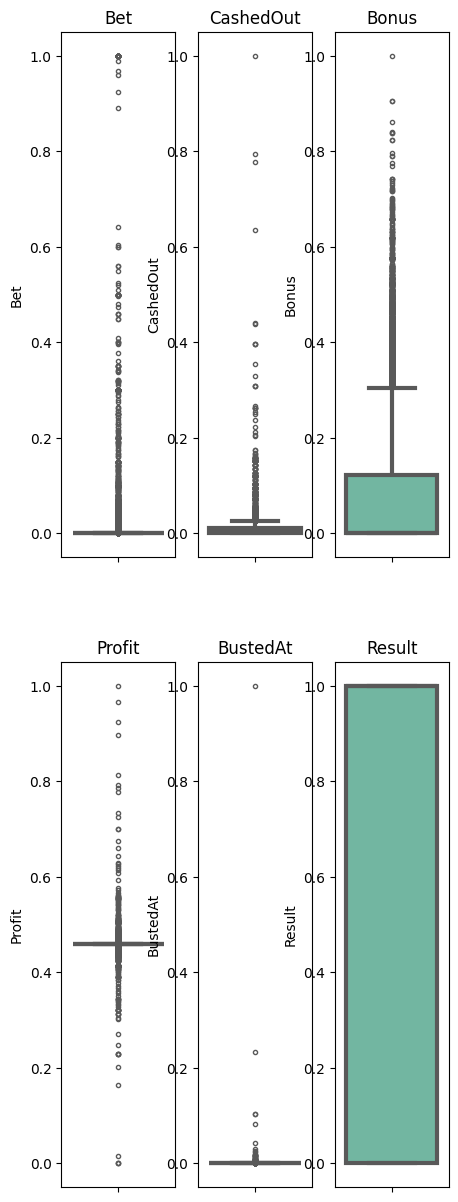

In [ ]:
#Independizamos cada boxplot en su propia escala
plt.figure(figsize=(5, 15))
#num_subplots = min(len(escaladas), len(cuantitativos), 6)
for i in range (len(escaladas)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data = escaladas[cuantitativos[i]], linewidth = 3, palette="Set2", fliersize = 3)
    plt.title(cuantitativos[i])
plt.subplots_adjust(wspace=0.5)
#plt.show()

In [ ]:
#Nueva base de datos escalada, con datos sintéticos y codificada
data_cat_Dummy = pd.get_dummies(escaladas, drop_first = True)

display(data_cat_Dummy)

,Bet,CashedOut,Bonus,Profit,BustedAt,Result
0,0.000004,0.009524,0.000000,0.459561,0.000033,1.0
1,0.000002,0.000000,0.000000,0.459559,0.000006,0.0
2,0.000003,0.010556,0.247117,0.459561,0.000013,1.0
3,0.000009,0.000000,0.000000,0.459556,0.000006,0.0
4,0.000049,0.011905,0.115321,0.459572,0.000009,1.0
...,...,...,...,...,...,...
49995,0.000003,0.000000,0.000000,0.459558,0.000019,0.0
49996,0.002999,0.008254,0.000000,0.459615,0.000020,1.0
49997,0.000000,0.000000,0.000000,0.459560,0.000004,0.0
49998,0.000067,0.010556,0.000000,0.459571,0.000076,1.0
